## Fake News Detection using Kaggle Dataset 1
#### Dataset : URL, Headline, Body, Label 

## Content of the Notebook.
* ### Data preprocessing
* ### Text preprocessing
* ### Model Selection & Implementation




In [23]:
import pandas as pd

In [24]:
# from google.colab import files
# files.upload()


{}

In [25]:
df=pd.read_csv('../Datasets/Kaggle/Dataset_1/data.csv')
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


# Data Preprocessing

In [26]:
## Get the Independent Features
X=df.drop('Label',axis=1)

In [27]:
X.head()

,URLs,Headline,Body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed..."
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin..."


In [28]:
## Get the Dependent features
y=df['Label']

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [30]:
df.shape

(4009, 4)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
df=df.dropna()#dropping the Nan values

In [33]:
df.shape

(3988, 4)

In [34]:
messages=df.copy()


In [35]:
messages.reset_index(inplace=True)## reseting the index after eliminating nan values

In [36]:
messages.head(10)

,index,URLs,Headline,Body,Label
0,0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [37]:
messages['Body'][6]

"In 2012, Kansas lawmakers, led by Gov. Sam Brownback, a Republican, enacted a tax cut that eliminated state income taxes entirely for pass-through entities — such as sole proprietorships and limited liability partnerships — which are taxed at the owner’s individual income tax rate. The law also lowered individual income tax rates, cutting the top rate to 4.9 percent from 6.4 percent.\nThe tax package reduced state revenue by nearly $700 million a year, a drop of about 8 percent, from 2013 through 2016, according to the Kansas Legislative Research Department, forcing officials to shorten school calendars, delay highway repairs and reduce aid to the poor. Research suggests the package did not stimulate the economy, certainly not enough to pay for the tax cut. This year, legislators passed a bill to largely rescind the law, saying it had not worked as intended.\n“It caused a lot of budget instability,” said State Senator Jim Denning, a Republican who led the effort to repeal the pass-thr

# Text Preprocessing

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Body'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
corpus[3]

'mexico citi reuter egypt cheiron hold limit right partner mexican nation oil compani pemex onshor cardena mora project industri regul said wednesday tie mark second joint ventur pemex equiti partner sinc energi open final end compani decad long monopoli allow develop project privat foreign oil compani cardena mora squar mile sq km field locat tabasco state believ contain million barrel oil equival boe proven probabl possibl reserv'

In [40]:
## Applying TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [41]:
X.shape

(3988, 5000)

In [42]:
y=messages['Label']

In [43]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [44]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'aaron judg',
 'aaron kesel',
 'aaron rodger',
 'ab',
 'abandon',
 'abc',
 'abe',
 'aberti',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'abus',
 'ac',
 'academ',
 'academi',
 'acc']

In [45]:
tfidf_v.get_params()# things what you have applied in tfidf

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [46]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [47]:
count_df.head()

,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,abl,abort,abroad,absenc,absolut,abus,ac,academ,academi,acc,acc network,accept,access,accid,accompani,accomplish,accord,accord report,account,account allsportsdacc,account allsportsdacc pleas,accur,accus,ace,achiev,acknowledg,acquir,acquisit,acr,across,...,www conservativedailynew,www conservativedailynew com,www jetnat,www jetnat com,xi,yanke,yard,yard carri,yard per,yard td,yard touchdown,ye,yeah,year,year ago,year later,year old,year year,yemen,yesterday,yet,yet anoth,yield,york,york citi,york giant,york jet,york time,york time newslett,york time product,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.073735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.078343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.041322,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071497,0.021101,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034603,0.0,0.0,0.021007,0.0,0.0,0.0,0.000000,0.0,0.0,0.141461,0.0,0.0,0.0,0.177829,0.024724,0.024724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047467,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129732,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import matplotlib.pyplot as plt

In [49]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model selection and model building.

In [50]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [51]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.893
Confusion matrix, without normalization


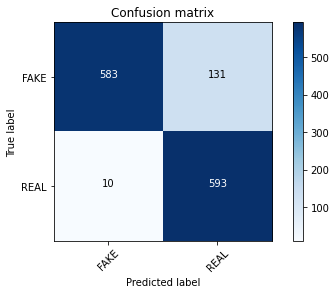

In [52]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [53]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8929384965831435

In [54]:
y_train.shape

(2671,)

In [55]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.987
Confusion matrix, without normalization


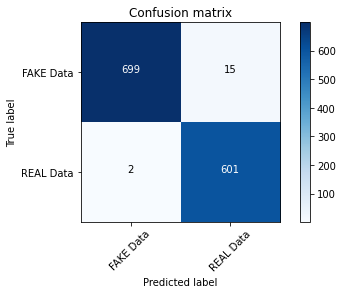

In [56]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## PassiveAgressive classifier gives a higher score as compared to multinomialnb.

